# Hands-on Machine LEarning with Scikit-learn, Keras & Tensorflow

## Aurelien Geron

## Second EDITION

### OREILLY

### Chapter 4


# Linear Regression

The linear regression model is the way that we deal with continuous output in the way of predicting this output, but first, we need to train this model on some data, evaluate the model, get the best parameters that minimize the cost function.

The way we can train the model is differned:

- There is a closed-form using Normal Equation.
- And there is an iterative form using the Gradient Descent.

Linear_model(h_Θ or y_hat or Predicited value) = **  Θ_0 + Θ_1X **, so the model trying to predict the output by:

- Computing weighted sum for the input futures X multipled by some Θ(paramters or weights).
- Add constant term called bias  or intercept

**Θ** is the paprmaters that contain Θ_0 bias term + [Θ_1 - Θ_n] the weights assicated with the features [x_1 - x_n].


# Normal Equation

We can get the values of Θ that minimize the cost function very well directly in one step, but like this operation can work in case of up to (10000) number of features because of the complexity of multiplication then inversing about O(n3), one the other hand it can cause error when X is not invertible (singular), and in like this case we can use another function that get the ineverse anyway.

<img src="../images/1.png" width="200" height="200">

- T means Transpose of the matrix.
- -1 means the inverse of the matrix.

# Note !

More details in the **Materials Direction**



# Linear Regression Using Normal Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
print(X.shape)
y = 4 + 3 * X * np.random.rand(100, 1)
print(y.shape)

(100, 1)
(100, 1)


Text(0.5, 1.0, 'Linear Data')

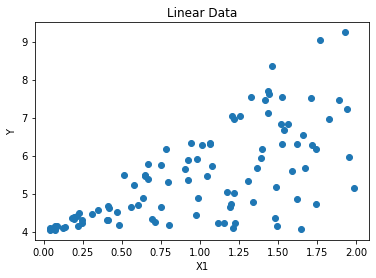

In [3]:
plt.scatter(X, y)
plt.xlabel("X1")
plt.ylabel("Y")
plt.title("Linear Data")


In [4]:
# Add x_0 which equal to 1 which have no effect but help us doing matrix multiplication

X_b = np.c_[np.ones((100,1)), X] # Add x_0 = 1 for each instance
print(X_b.shape)

(100, 2)


In [5]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best.shape)
theta_best

(2, 1)


array([[4.01213799],
       [1.45129086]])

# Note !!

We will hope that theta_0 to be 4 and theta_1 to be 3 as we can see in the y generated equation but because of the random value we add to each instance of y we have closed values of thetas to the original ones, this because the model trying to learn as much as possible.

# Now make new prediction

We make the prediction by the y_hat(hypothesis function or called h(Θ) ).


<img src="../images/2.png" width="200" height="200">


In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

# Actually, the same of theta transpose * X, because theta of sin 2*1 transpose it is 1*2 and x 2*2 so the same
print(X_new_b)
predict = np.dot(X_new_b, theta_best)
predict # return to graph and check when x_1 = 0, and x_1 = 2 the range of values is closed to here

[[1. 0.]
 [1. 2.]]


array([[4.01213799],
       [6.91471972]])

# Predict X we have generate and plot it

In [7]:
X_predicit = X_b.dot(theta_best)
print(X.shape)
print(X_predicit.shape)
print(y.shape)

(100, 1)
(100, 1)
(100, 1)


(0.0, 2.0, 0.0, 10.0)

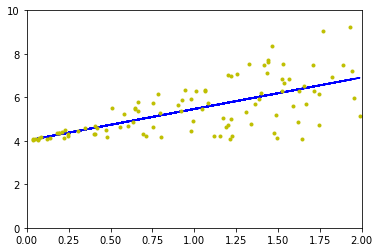

In [8]:
plt.plot(X, X_predicit, "b-")
plt.plot(X, y, "y.")
plt.axis([0,2, 0, 10])

# Linear Regression Using Sklearn

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X,y) # by default add x_0

# intercept_ is theta_0, coef_ is theta_1
print(lin_reg.intercept_, lin_reg.coef_) # same enough to what we got from the normal equation
print("="*50)
print(lin_reg.predict(X_new))

[4.01213799] [[1.45129086]]
[[4.01213799]
 [6.91471972]]


# Graident Decsent

**A different way to train Linear Model is using Gradient Descent, in the case of a large number of features we have.**

**"Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a widerange of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order tominimize a cost function. " **

<table><tr>
<td> <img src="../images/3.png" style="width: 400; height:300px"/> </td>
<td> <img src="../images/4.png" style="width: 400;  height:300px"/> </td>
<td> <img src="../images/5.png" style="width: 400;  height:300px"/> </td>
</tr></table>

As we are in Linear Regression we search for the parameters that minimize the cost function**MSE**, here is the linear regression using the Gradient Descent we should go through a number of iteration to optimize these thetas to minimize the cost function, the way we minimize wights are different in the step the model takes from one iteration to another which called **learning Rate**, as we can see in graph how different **Learning Rate**, lead to the result but one of the models take a too long time or steps to reach the global minimum and other one jump out the global(Model diverge).

The best one is this one that the model reaches the global minimum in such a good number of iterations.

# Note 

**The learning step size is proportional to the slope of the cost function, so the steps gradually get smaller as the parameters approach the minimum.**

As we can see we have some of the hyperparamters:

- The number of iteration the model need for converge
- The learning Reate value

Not all cost function looks nice (Regular Bowls) as we have in MSE, some of the cost function we need to minimize have holes, ridges, plateaus and all sorts of irregular shapes, and to make converge to the global minimum is difficult and as we can see in the graph may be in the local minimum instead of Global minimum, as well as take too much time to cross the plateau on the right of the graph.


<img src="../images/6.png" style="width: 400; height:300px"/>

**"Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, whichmeans that if you pick any two points on the curve, the line segment joining them never crosses the curve.

- This implies that there are no local minima, just one global minimum.
- It is also a continuous function withn a slope that never changes abruptly.

These two facts have a great consequence: Gradient Descent isguaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learningrate is not too high)."**

The cost function has the shape of a bowl, but if the features have different ranges it can cause the shape to be an elongated bowl, so it will take a long time, because small ranges take a too long time to change.

<img src="../images/7.png" style="width: 400; height:300px"/>

# Batch Gradient Descent

Implement gradient descent is to know how the cost function will change if we change the parameters thetas, and this is called partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions).

**The gradient vector,  MSE(θ), contains all the partial derivatives of the cost function**

<img src="../images/8.png">

The Batch Gradient Descent above feed the full data into the model for each step in graident descent, but we should ask if it can fit our memory? the computing power needed? what if we add more instances to the data should I train from scratch?.

Once we get the **gradient vector** we need to change thetas which will change the cost function trying to minimize it so we will subtract the old thetas from **gradient vector**, but there is another factor(hyperparameters) called **Learning Rate** we mentioned above, its effect our steps in change these thetas, by multiplying it by the **gradient vector**., to determine the size of the downhill we need to take according to reach the ground from the mountain.


<img src="../images/9.png">

In [10]:
def inilize_params(eta):
    eta = eta
    n_iterations = 1000
    m = 100
    thetas = np.random.rand(2, 1)
    return eta, n_iterations, m, thetas

def batch_graident_descent_manual(X, y, eta, n_iterations, m, thetas):
    all_thetas = []
    for i in range(n_iterations):
        
        graident_vector = (2/m) * np.dot(X.T, (np.dot(X, thetas) - y))
        
        thetas = thetas - eta * graident_vector
        
        all_thetas.append(thetas)
        
    return all_thetas, thetas

In [11]:
eta1, n_iterations, m, thetas1  = inilize_params(.02)
eta2, n_iterations, m, thetas2 = inilize_params(.1)
eta3, n_iterations, m, thetas3 = inilize_params(.5)

all_thetas1, best_thetas1 = batch_graident_descent_manual(X_b, y, eta1, n_iterations, m, thetas1)
all_thetas2, best_thetas2 = batch_graident_descent_manual(X_b, y, eta2, n_iterations, m, thetas2)
all_thetas3, best_thetas3 = batch_graident_descent_manual(X_b, y, eta3, n_iterations, m, thetas3)

In [12]:
print(best_thetas1)
print(best_thetas2)
print(best_thetas3)

[[4.00817722]
 [1.4546976 ]]
[[4.01213799]
 [1.45129086]]
[[-3.09532147e+61]
 [-3.59870798e+61]]


# The difference Effect of learning rate

"On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take along time. In the middle, the learning rate looks pretty good: in just a few iterations, it has alreadyconverged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping allover the place and actually getting further and further away from the solution at every step"

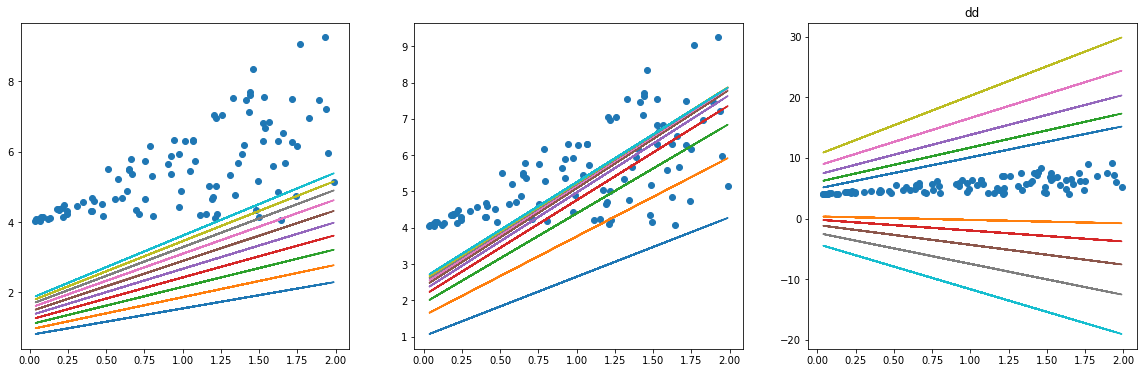

In [13]:
count = 0;
theta_list = [all_thetas1, all_thetas2, all_thetas3]
learn_rates = [eta1, eta2, eta3]
fig, axis = plt.subplots(1, 3, figsize=(20, 6))

for i in axis:
    plt.title("dd")
    i.scatter(X, y)
    for g in range(10):
        all_thetas = theta_list[count]
        X_predicit = X_b.dot(all_thetas[g])
        i.plot(X, X_predicit)
        
    count +=1


# Tolerance

You may wonder how to set the number of iterations. If it is too low, you will still be far away from theoptimal solution when the algorithm stops, but if it is too high, you will waste time while the modelparameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the sum between two **gradient vector** becomes tiny — that is, when its norm becomes smaller than a tiny number ε (called the tolerance) — because this happens when Gradient Descent has (almost) reached the minimum.

# Stochastic Gradient Descent

The name Stochastic is about the randomness in this model, its train the model instance by instance and pick the instance randomly so it may take the same instance multiple time and for this, we can go from the first instance to last one but ensure that our data is shuffled, this model helps us in the problem or large dataset since the name **out-of-core** when its come to very large dataset, and the Batch learning can not dealing with because of our limited resource from memory, computing or even the network itself, on the other hand, SGD is faster, it trains instance for each iteration.

Not just that when it comes to online learning SGD will be the first choice as we do not need to re-run the model from scratch for each time new data coming as in the case of Batch learning.

But, because of this training instance by instance and randomness, the cost function bounce up and down, because it less regular than Batch learning,  Over time it will end up very close to the minimum, but once itgets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.


<img src="../images/10.png" style="width: 400; height:300px"/>


Because of problem the the model can never settle at the minimum, there is a process called simulated annealing, and the function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen half way to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a sub optimal solution if you halt training too early

In [14]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparamter
thetas = np.random.rand(2,1)
m = 100

def learning_schedule(t):
    return t0 / (t+t1)

def stochastic_graident_descent_manual(thetas):
    all_thetas = []
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m) # get any random instance
            xi = X_b[random_index: random_index+1] # to handle shape
            yi = y[random_index]
            
            graidents_vector = 2 * xi.T.dot(np.dot(xi, thetas) - yi)
            eta = learning_schedule(epoch * m + i)
            thetas = thetas - eta * graidents_vector
            
        all_thetas.append(thetas)
    return thetas, all_thetas
random_index = np.random.randint(m)

In [15]:
thetas, all_thetas = stochastic_graident_descent_manual(thetas)
thetas

array([[4.04293593],
       [1.41333572]])

# Note !!
By convention we iterate by rounds of m iterations; each round is called an epoch. While the BatchGradient Descent code iterated 1,000 times through the whole training set, this code goes through thetraining set only 50 times and reaches a fairly good solution:

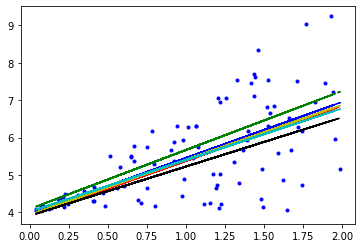

In [16]:
plt.plot(X, y, 'b.')
def plot_one_by_one(thetas,color):
    X_predicit = X_b.dot(thetas)
    plt.plot(X, X_predicit, color)

# See how the its irregular learning follow the color of lines for different epochs
plot_one_by_one(all_thetas[0], 'r--')
plot_one_by_one(all_thetas[1], 'g--')
plot_one_by_one(all_thetas[2], 'b--')
plot_one_by_one(all_thetas[3], 'y--')
plot_one_by_one(all_thetas[4], 'k--')
plot_one_by_one(all_thetas[5], 'c--')



# SGD using sklearn

The following code runs max 1000 epochs or until the loss drop by  tol=1e-3, starting with alearning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one),and it does not use any regularization (penalty=None), and 

In [17]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=.1)
sgd_reg.fit(X, y)

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.98123326] [1.45703106]


/home/abdelrahman/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Mini-Batch Gradient Descent

The mid way between Batch and Stochastic gradient descent is the mini-batch, instead of full data as in Batch or just one random instance for each time in case of Stocasitic, the mini-batch take a small random set of instances from the data then train on it. The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

The Mini-batch is less irregular than SGD, but it may be harder to escape from local minimum than the SGD, especially with fairly large mini-batches.

Batch GD path actually stops at the minimum, while both Stochastic GD and Mini-batch GD get close. However, thae Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if we used a good learning schedule.

<img src="../images/11.png" style="width: 400; height:300px"/>


**There is almost no difference after training: all these algorithms end up with very similar models and make predictions in exactlythe same way**

<img src="../images/12.png" style="width: 400; height:300px"/>


# Polynomial Regression

Instead of using the feature as it in the data, we can use such a more computation model, with increase the number of features using the Polynomial model, and it help in case of underfitting when the data so complex and linear model can not fit well on the data, this way work as to get the power of each feature as a new feature, but also another way is to get all combination between features.

# Generated nonlinear and noisy dataset

In [18]:
m = 100
X = 7.610 * np.random.rand(m, 1) - 2.897
y = .5 * X**2 + X + 2.3 + np.random.randn(m, 1)

(-3.0, 3.0, 0.0, 10.0)

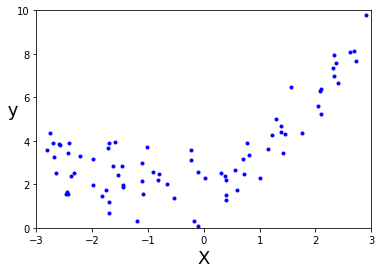

In [19]:
plt.plot(X, y, "b.")
plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=1, fontsize=18)
plt.axis([-3, 3, 0, 10])

A straight line(linear line) can not deal with this complex data, so we can add the second poly (degree=2).


In [20]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X.shape)
print(X_poly.shape)
print(X[0])
X_poly[0]

(100, 1)
(100, 2)
[-1.98296168]


array([-1.98296168,  3.93213703])

In [21]:
# Now lets train Linear model on this features after add second degree

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

# As we can see intercept_ = theta 0, and thetas from 1 to n is coef_ 
# as we have just 2 features after second degree
print(lin_reg.intercept_, lin_reg.coef_)

[2.15687935] [[0.91056688 0.52970088]]


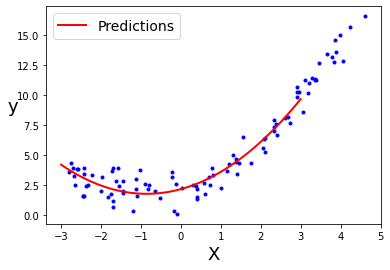

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")

plt.xlabel("X", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)


# Learning Curves

The data generated above with second polynomial degree and we fit the model of second degree so its looks are better, but usually, we do not know how the data generated so we need to know is the model overfitting or underfitting or even fitting well in training and validation, one way is using the validation set as in cross-validation. Another way is to look at the learning curves: these are plots of the model’s performance on the trainingset and the validation set as a function of the training set size. To generate the plots, simply train the model several times on different sized subsets of the training set. 

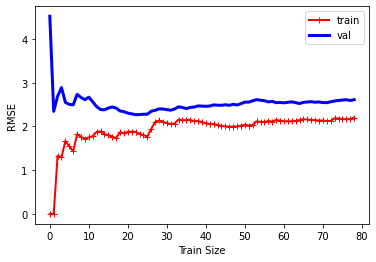

In [23]:
def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
    train_errors,val_errors=[],[]
    for m in range(1 ,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_predict=model.predict(X_val) # Validation on the whole data while train instance by instance
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.xlabel("Train Size")
    plt.ylabel("RMSE")
    plt.legend()
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

# Note !!

We can see from Training Size associated with RMSE error how the error was in the first 2 or 3 instances looks like no error(0), but as instances added it goes up to about 2, but as you add new instances the error looks like not change or very little changes, this because it stuck in local minimum as new instances do not change the error. So If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.

Now let’s look at the performance of the model onthe validation data. When the model is trained on very few training instances, it is incapable ofgeneralizing properly, which is why the validation error is initially quite big.

# What if is looks like that

Because I have trying different degree of models and actually you will find below it pretty fit as it did will on both training and testing, but in the image below we will see that the overfitting problem, how model fit well on training but it incapable of generalization.

**One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.**


<img src="../images/13.png" style="width: 400; height:300px"/>


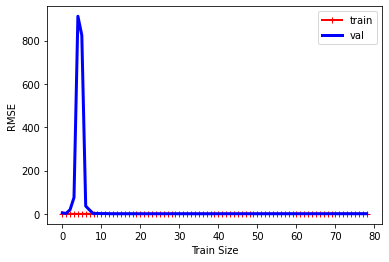

In [24]:
# As we can see how close the error from training to validation and small in both so it best one
poly_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=4, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(poly_regression, X, y)

# Regularized Linear Models

To deal with the overfitting problem we trying to constrain the model from the freedom of fitting data, there are different approaches of reducing overfitting like feed new instance to the model, another one is to regularize the cost function in the training as it will change later in the vector that changes the weights.

# Ridge Regression

Ridge Regression is the regularized version that used with linear model, it adds a part to the cost function as we can see below:

<img src="../images/14.png" style="width: 400; height:300px"/>


This alpha α controls how much you want to regularize the model, and if it 0 it will have no effect as too large will convert from overfitting problem to underfitting as the weight will be close to 0.

shows several Ridge models trained on some linear data using different α value. On the left,plain Ridge models are used, leading to linear predictions. On the right, the data is first expanded usingPolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge
models are applied to the resulting features: this is Polynomial Regression with Ridge regularization.Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions; this reduces themodel’s variance but increases its bias.

<img src="../images/15.png" style="width: 400; height:300px"/>

### Implement Ridge using Closed-form and using SGD

In [25]:
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[6.84434208]])

In [26]:
sgd_reg=SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([6.81117331])

# Lasso Regression

Instead of l2 norm Lasso use the l1 norm.

In [27]:
lasso_reg=SGDRegressor(penalty="l1")
lasso_reg.fit(X,y.ravel())
lasso_reg.predict([[1.5]])

array([6.82247683])